# Strain Stock gDNA Sequencing Analysis
## Seq Library: Plasmidsaurus_10-06-2025_P4CYGL

Processing started on 11-6-25 on Poplar.

## Steps
1. Data organization, file renaming
2. Short reads: QA/QC
3. Short reads: Breseq (refseqs: ADP1, ACN2821)
3. Long read: QA/QC
4. Long reads: Blast analysis

In [2]:
## Running on poplar
## Make sure running in appropriate kernel

import sys, os

# Must add environment's bin to the PATH inside the notebook
env_bin = os.path.join(os.path.dirname(sys.executable), "")
os.environ["PATH"] = env_bin + ":" + os.environ["PATH"]

# Must add ai_synbio repo to PATH
sys.path.append('/home/nspahr/code/ai_synbio_data_processing/')

In [3]:
# Reload magic command to ensure that changes made to my imported modules are being picked up by the notebook continuously

%load_ext autoreload
%autoreload 2

In [4]:
# Define AI-Synbio project data directories

LIB_DIR = '/storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/'
library = 'Plasmidsaurus_10-06-2025_P4CYGL'
lib_path = os.path.join(LIB_DIR, library)
shortlib = os.path.join(lib_path, os.path.basename(lib_path) + '_Illumina')
longlib = os.path.join(lib_path, os.path.basename(lib_path) + '_Nanopore')

In [5]:
# Define my Jupyter Hub home directories for viewing intermittent results

home_lib_path = os.path.join('/storage/nspahr/', 'lib_analysis', library)
os.makedirs(home_lib_path, exist_ok=True)

## Short reads: QA/QC

In [6]:
short_received = os.path.join(shortlib, 'received')

In [90]:
import os
from binfo_utils import create_manifest

manifest = create_manifest(short_received, platform='plasmidsaurus_hybrid')
manifest

,sample_name,fwd_fastq,rvs_fastq
0,P4CYGL_1_ANLstock.ACN2586.colony1,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...
1,P4CYGL_2_ANLstock.ACN2586.colony2,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...
2,P4CYGL_3_ANLstock.ACN2586.colony3,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...


In [92]:
# Rename Illumina fastqs

for index, row in manifest.iterrows():
    old_fwd_name = os.path.basename(row['fwd_fastq'])
    new_fwd_name = ('_').join(old_fwd_name.split('_')[2:])
    new_fwd_path = os.path.join(os.path.dirname(row['fwd_fastq']), new_fwd_name)
    os.rename(row['fwd_fastq'], new_fwd_path)
    old_rvs_name = os.path.basename(row['rvs_fastq'])
    new_rvs_name = ('_').join(old_rvs_name.split('_')[2:])
    new_rvs_path = os.path.join(os.path.dirname(row['rvs_fastq']), new_rvs_name)
    os.rename(row['rvs_fastq'], new_rvs_path)

### QC of received

In [38]:
from read_qc import run_fastqc
from binfo_utils import create_manifest

manifest = create_manifest(short_received, platform='plasmidsaurus_hybrid')

[run_fastqc(f) for f in manifest['fwd_fastq']]
[run_fastqc(f) for f in manifest['rvs_fastq']]

Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
application/gzip


Started analysis of P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 5% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 10% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 15% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 20% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 25% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 30% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 35% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 40% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 45% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 50% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 55% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 60% complete for P4CYGL_1_ANLstock.ACN2586.colony1

Analysis complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
application/gzip


Started analysis of P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 5% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 10% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 15% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 20% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 25% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 30% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 35% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 40% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 45% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 50% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 55% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 60% complete for P4CYGL_2_ANLstock.ACN2586.colony2

Analysis complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
application/gzip


Started analysis of P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 5% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 10% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 15% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 20% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 25% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 30% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 35% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 40% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 45% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 50% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 55% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 60% complete for P4CYGL_3_ANLstock.ACN2586.colony3

Analysis complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
application/gzip


Started analysis of P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 5% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 10% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 15% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 20% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 25% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 30% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 35% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 40% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 45% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 50% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 55% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 60% complete for P4CYGL_1_ANLstock.ACN2586.colony1

Analysis complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
application/gzip


Started analysis of P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 5% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 10% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 15% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 20% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 25% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 30% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 35% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 40% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 45% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 50% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 55% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 60% complete for P4CYGL_2_ANLstock.ACN2586.colony2

Analysis complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
application/gzip


Started analysis of P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 5% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 10% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 15% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 20% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 25% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 30% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 35% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 40% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 45% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 50% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 55% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 60% complete for P4CYGL_3_ANLstock.ACN2586.colony3

Analysis complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz


[None, None, None]

In [71]:
from read_qc import run_multiqc
import shutil

multiqc_report = run_multiqc(short_received)
shutil.copy(multiqc_report, home_lib_path)


/// ]8;id=391020;https://multiqc.info\MultiQC]8;;\ v1.32

       file_search | Search path: /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received


        searching | ████████████████████████████████████████ 100% 18/18                                                   html

            fastqc | Found 6 reports
     write_results | Data        : multiqc_data
     write_results | Report      : multiqc_report.html
           multiqc | MultiQC complete


'/storage/nspahr/lib_analysis/Plasmidsaurus_10-06-2025_P4CYGL/multiqc_report.html'

### Trimming with cutadapt

MultiQC report indicated poly-G tails in read 2

In [72]:
import subprocess
from binfo_utils import create_manifest

short_trimmed = os.path.join(shortlib, 'trimmed')
os.makedirs(short_trimmed, exist_ok=True)

manifest = create_manifest(short_received, platform='plasmidsaurus_hybrid')

for index, row in manifest.iterrows():

    read1 = str(os.path.basename(row['fwd_fastq'])).replace('.fastq.gz', '_trimmed.fastq.gz') 
    read2 = str(os.path.basename(row['rvs_fastq'])).replace('.fastq.gz', '_trimmed.fastq.gz')
    sample_name = row['sample_name']
    
    cutadapt_cmd = [
        'cutadapt',
        '-j', '10',
        '-q', '15, 15',  # quality cut-off, trimmed from both reads
        '-A', 'G{10}',  # fastQC indicated poly-G in read 2
        '--revcomp',
        '--minimum-length',  '20',
        '-o', os.path.join(short_trimmed, read1),
        '-p', os.path.join(short_trimmed, read2),
        row['fwd_fastq'],
        row['rvs_fastq'],
        f'--json={sample_name}.cutadapt.json'
    ]

    subprocess.run(cutadapt_cmd, check=True, cwd=short_trimmed)

This is cutadapt 5.2 with Python 3.12.12
Command line parameters: -j 10 -q 15, 15 -A G{10} --revcomp --minimum-length 20 -o /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz -p /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz --json=P4CYGL_1_ANLstock.ACN258

### QC of cutadapt trimmed

In [73]:
from read_qc import run_fastqc
from binfo_utils import create_manifest

manifest = create_manifest(short_trimmed, platform='plasmidsaurus_hybrid')

[run_fastqc(f) for f in manifest['fwd_fastq']]
[run_fastqc(f) for f in manifest['rvs_fastq']]

Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 5% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 10% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 15% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 20% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 25% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 30% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 35% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 40% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 45% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 50% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 55% complete for P4CYGL_1_ANLstock.ACN258

Analysis complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 5% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 10% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 15% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 20% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 25% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 30% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 35% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 40% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 45% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 50% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 55% complete for P4CYGL_2_ANLstock.ACN258

Analysis complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 5% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 10% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 15% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 20% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 25% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 30% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 35% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 40% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 45% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 50% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 55% complete for P4CYGL_3_ANLstock.ACN258

Analysis complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 5% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 10% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 15% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 20% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 25% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 30% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 35% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 40% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 45% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 50% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 55% complete for P4CYGL_1_ANLstock.ACN258

Analysis complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 5% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 10% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 15% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 20% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 25% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 30% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 35% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 40% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 45% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 50% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 55% complete for P4CYGL_2_ANLstock.ACN258

Analysis complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 5% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 10% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 15% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 20% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 25% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 30% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 35% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 40% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 45% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 50% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 55% complete for P4CYGL_3_ANLstock.ACN258

Analysis complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz


[None, None, None]

In [74]:
from read_qc import run_multiqc
import shutil

multiqc_report = run_multiqc(short_trimmed)
shutil.copy(multiqc_report, home_lib_path)


/// ]8;id=459103;https://multiqc.info\MultiQC]8;;\ v1.32

       file_search | Search path: /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed
          cutadapt | Found 3 reports


        searching | ████████████████████████████████████████ 100% 21/21                                                   html

            fastqc | Found 6 reports
     write_results | Data        : multiqc_data
     write_results | Report      : multiqc_report.html
           multiqc | MultiQC complete


'/storage/nspahr/lib_analysis/Plasmidsaurus_10-06-2025_P4CYGL/multiqc_report.html'

### Trimming with fastp

In [22]:
import subprocess
from binfo_utils import create_manifest
from read_qc import run_fastp

short_trimmed_fastp = os.path.join(shortlib, 'trimmed_fastp')
os.makedirs(short_trimmed_fastp, exist_ok=True)

manifest = create_manifest(short_received, platform='plasmidsaurus_hybrid')

for index, row in manifest.iterrows():
    read1_in_path = row['fwd_fastq']
    read2_in_path = row['rvs_fastq']
    read1_in_basename = os.path.basename(read1_in_path)
    read2_in_basename = os.path.basename(read2_in_path)
    read1_out_path = os.path.join(short_trimmed_fastp, read1_in_basename.replace('.fastq.gz', '_trimmed.fastq.gz'))
    read2_out_path = os.path.join(short_trimmed_fastp, read2_in_basename.replace('.fastq.gz', '_trimmed.fastq.gz'))
    run_fastp(read1_in_path, read2_in_path, read1_out_path, read2_out_path, threads=64)

Running fastp on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed_fastp/ANLstock.ACN2586.colony1_illumina


Read1 before filtering:
total reads: 41936608
total bases: 6332427808
Q20 bases: 6294563968(99.4021%)
Q30 bases: 6170816360(97.4479%)
Q40 bases: 6170816360(97.4479%)

Read2 before filtering:
total reads: 41936608
total bases: 6332427808
Q20 bases: 6225368662(98.3094%)
Q30 bases: 5936116680(93.7416%)
Q40 bases: 5936116680(93.7416%)

Read1 after filtering:
total reads: 41560690
total bases: 6139791942
Q20 bases: 6119658464(99.6721%)
Q30 bases: 6020152382(98.0514%)
Q40 bases: 6020152382(98.0514%)

Read2 after filtering:
total reads: 41560690
total bases: 6139791942
Q20 bases: 6064174394(98.7684%)
Q30 bases: 5800303868(94.4707%)
Q40 bases: 5800303868(94.4707%)

Filtering result:
reads passed filter: 83121380
reads failed due to low quality: 748076
reads failed due to too many N: 3760
reads failed due to too short: 0
reads with adapter trimmed: 5476324
bases trimmed due to adapters: 272105904

Duplication rate: 62.9151%

Insert size peak (evaluated by paired-end reads): 263

JSON report: /s

Running fastp on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed_fastp/ANLstock.ACN2586.colony2_illumina


Read1 before filtering:
total reads: 52672834
total bases: 7953597934
Q20 bases: 7899735590(99.3228%)
Q30 bases: 7733622400(97.2343%)
Q40 bases: 7733622400(97.2343%)

Read2 before filtering:
total reads: 52672834
total bases: 7953597934
Q20 bases: 7806699454(98.1531%)
Q30 bases: 7418161710(93.268%)
Q40 bases: 7418161710(93.268%)

Read1 after filtering:
total reads: 52163162
total bases: 7689851126
Q20 bases: 7663379364(99.6558%)
Q30 bases: 7532912762(97.9591%)
Q40 bases: 7532912762(97.9591%)

Read2 after filtering:
total reads: 52163162
total bases: 7689851126
Q20 bases: 7585424532(98.642%)
Q30 bases: 7231510982(94.0397%)
Q40 bases: 7231510982(94.0397%)

Filtering result:
reads passed filter: 104326324
reads failed due to low quality: 1014656
reads failed due to too many N: 4688
reads failed due to too short: 0
reads with adapter trimmed: 7506724
bases trimmed due to adapters: 373999008

Duplication rate: 63.2608%

Insert size peak (evaluated by paired-end reads): 264

JSON report: /st

Running fastp on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed_fastp/ANLstock.ACN2586.colony3_illumina


Read1 before filtering:
total reads: 42324324
total bases: 6390972924
Q20 bases: 6349171572(99.3459%)
Q30 bases: 6219650578(97.3193%)
Q40 bases: 6219650578(97.3193%)

Read2 before filtering:
total reads: 42324324
total bases: 6390972924
Q20 bases: 6281880682(98.293%)
Q30 bases: 5990171564(93.7286%)
Q40 bases: 5990171564(93.7286%)

Read1 after filtering:
total reads: 41935348
total bases: 6170537724
Q20 bases: 6149694266(99.6622%)
Q30 bases: 6048499566(98.0222%)
Q40 bases: 6048499566(98.0222%)

Read2 after filtering:
total reads: 41935348
total bases: 6170537724
Q20 bases: 6093933360(98.7585%)
Q30 bases: 5829083822(94.4664%)
Q40 bases: 5829083822(94.4664%)

Filtering result:
reads passed filter: 83870696
reads failed due to low quality: 773956
reads failed due to too many N: 3996
reads failed due to too short: 0
reads with adapter trimmed: 6640144
bases trimmed due to adapters: 323959372

Duplication rate: 62.512%

Insert size peak (evaluated by paired-end reads): 271

JSON report: /sto

In [23]:
os.listdir(short_trimmed_fastp)

['ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz',
 'ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz',
 'ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz',
 'ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz',
 'ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz',
 'ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz',
 'ANLstock.ACN2586.colony1_illumina_fastp.json',
 'ANLstock.ACN2586.colony1_illumina_fastp.html',
 'ANLstock.ACN2586.colony2_illumina_fastp.json',
 'ANLstock.ACN2586.colony2_illumina_fastp.html',
 'ANLstock.ACN2586.colony3_illumina_fastp.json',
 'ANLstock.ACN2586.colony3_illumina_fastp.html']

### QC of fastp-trimmed

In [26]:
from read_qc import run_fastqc
from binfo_utils import create_manifest

manifest = create_manifest(short_trimmed_fastp, platform='plasmidsaurus_hybrid')

[run_fastqc(f, threads=64) for f in manifest['fwd_fastq']]
[run_fastqc(f, threads=64) for f in manifest['rvs_fastq']]

Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed_fastp/ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 55% complete for ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 60% complete for ANLstock.ACN2586.colony1_illumina_R1_trimmed.

Analysis complete for ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed_fastp/ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 55% complete for ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 60% complete for ANLstock.ACN2586.colony2_illumina_R1_trimmed.

Analysis complete for ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed_fastp/ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 55% complete for ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 60% complete for ANLstock.ACN2586.colony3_illumina_R1_trimmed.

Analysis complete for ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed_fastp/ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 55% complete for ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 60% complete for ANLstock.ACN2586.colony1_illumina_R2_trimmed.

Analysis complete for ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed_fastp/ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 55% complete for ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 60% complete for ANLstock.ACN2586.colony2_illumina_R2_trimmed.

Analysis complete for ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz


[None, None, None]

In [27]:
from read_qc import run_multiqc
import shutil

multiqc_report = run_multiqc(short_trimmed_fastp)
shutil.copy(multiqc_report, home_lib_path)


/// ]8;id=285501;https://multiqc.info\MultiQC]8;;\ v1.32

       file_search | Search path: /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed_fastp


        searching | ████████████████████████████████████████ 100% 24/24                                                   html

             fastp | Found 3 reports
            fastqc | Found 6 reports
     write_results | Data        : multiqc_data
     write_results | Report      : multiqc_report.html
           multiqc | MultiQC complete


'/storage/nspahr/lib_analysis/Plasmidsaurus_10-06-2025_P4CYGL/multiqc_report.html'

**Results**
Fastp left almost all poly g tails (eventhough poly g trimming is automatically enabled), whereas cutadapt left the nextera transposase adapters (did not specifically direct removal of those). Poly g settings were the same between the tools (find and cut 10x G), so not sure why there is a difference. Maybe because fastp does quality trimming first, and then there are not enough Gs left…

## Short reads: Breseq

In [62]:
GENOME_DIR = '/storage/synbio/ai_synbio_data/reference_data/genomes'
genomes = ['ADP1_Neidle_CDM.gbk', 'ACN2821_CDM.gbk', 'ACN2586_NSS.gbk']

In [40]:
import os
from binfo_utils import create_manifest
from breseq import run_breseq

# Create breseq directory
breseq = os.path.join(shortlib, 'breseq')
os.makedirs(breseq, exist_ok=True)

short_trimmed = os.path.join(shortlib, 'trimmed')
manifest = create_manifest(short_trimmed, platform='plasmidsaurus_hybrid')

# Run breseq against genomes
for genome in genomes:
    breseq_param = os.path.join(breseq, f'breseq_{genome}_pop')
    os.makedirs(breseq_param, exist_ok = True)
    genome_path = os.path.join(GENOME_DIR, genome)
    
    for index, row in manifest.iterrows():
        sample_dir = os.path.join(breseq_param, row['sample_name'])
        os.makedirs(sample_dir, exist_ok = True)
        run_breseq(genome_path, sample_dir, row['fwd_fastq'], row['rvs_fastq'], polymorphism_prediction=True, threads=64)

Running breseq with command: breseq -r /storage/synbio/ai_synbio_data/reference_data/genomes/ACN2586_NSS.gbk /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/breseq/breseq_ACN2586_NSS.gbk_pop/ANLstock.ACN2586.colony1 -j 64 --polymorphism-prediction


breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /storage/synbio/ai_synbio_data/reference_data/genomes/ACN2586_NSS.gbk /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/breseq/breseq_ACN2586_NSS.gbk_pop/ANLstock.ACN2586.colony2 -j 64 --polymorphism-prediction


breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

In [63]:
from breseq_obj import Breseq, Breseq_params

breseq = os.path.join(shortlib, 'breseq')

for genome in genomes:
    breseq_param = os.path.join(breseq, f'breseq_{genome.replace('.gbk', '')}_pop')
    print(genome.replace('.gbk', ''))
    
    for index, row in manifest.iterrows():
        sample_dir = os.path.join(breseq_param, row['sample_name'])
        bre = Breseq.from_existing(sample_dir)

ADP1_Neidle_CDM
ACN2821_CDM
ACN2586_NSS


FileNotFoundError: Reference file '/storage/synbio/ai_synbio_data/reference_data/genomes/ACN2586_NSS.gbk.gbk' not found in REF_GENOMES directory: /storage/synbio/ai_synbio_data/reference_data/genomes

In [ ]:
........................................................................................................

In [44]:
from binfo_utils import create_breseq_manifest

manifest = create_breseq_manifest(lib_path, 'breseq_ACN2586_NSS_pop')

In [45]:
manifest

,library,breseq_param,sample_name,path_to_gdiff
0,Plasmidsaurus_10-06-2025_P4CYGL,breseq_ACN2586_NSS_pop,ANLstock.ACN2586.colony1,/storage/synbio/ai_synbio_data/experimental_da...
1,Plasmidsaurus_10-06-2025_P4CYGL,breseq_ACN2586_NSS_pop,ANLstock.ACN2586.colony2,/storage/synbio/ai_synbio_data/experimental_da...
2,Plasmidsaurus_10-06-2025_P4CYGL,breseq_ACN2586_NSS_pop,ANLstock.ACN2586.colony3,/storage/synbio/ai_synbio_data/experimental_da...


In [118]:
from breseq import count_mutations

manifest['n_mutations'] = [
    count_mutations(row['path_to_gdiff'], count_pols=True) for _, row in manifest.iterrows()
]


breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

    Counting mutations ANLstock.ACN2586.colony1

    Counting mutations ANLstock.ACN2586.colony2

    Counting mutations ANLstock.ACN2586.colony3




    Annotating mutations /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/breseq/breseq_ADP1_Neidle_CDM_pop/ANLstock.ACN2586.colony3/data/output.gd

*** End COUNT ***


In [90]:
import os
from breseq import compare_gdiff

# Compare gdiff files in each breseq_param directory

# Function that grabs all gdiffs from sample dir
def fetch_gdiffs_from_breseq_params_dir(breseq_param_dir):
    gdiffs = []
    subfolders = [x for x in os.listdir(breseq_param_dir) if os.path.isdir(x)]
    for folder in subfolders:
        gdiffs.append(os.path.join(folder, 'data', 'output.gd'))
    return gdiffs

# Generate comparison files in html and csv format
for genome in genomes:
    breseq_param = os.path.join(breseq, f'breseq_{genome}_pop')
    genome_path = os.path.join(GENOME_DIR, genome+'.gbk')

    compare_gdiff(
        genome_path,
        os.path.join(breseq_param, 'comparison.html'),
        fetch_gdiffs_from_breseq_params_dir(breseq_param)
    )
        compare_gdiff(
        genome_path,
        os.path.join(breseq_param, 'comparison.csv'),
        fetch_gdiffs_from_breseq_params_dir(breseq_param),
        format='CSV'
    )

In [ ]:
........................................................................................................

## Long Reads: QA/QC

In [ ]:
## Requires nanocomp (have to activate nanocomp_env first. Some incompatibility with tool in bre_env)

In [1]:
## Running on poplar
## Make sure running in appropriate kernel

import sys, os

# Must add environment's bin to the PATH inside the notebook
env_bin = os.path.join(os.path.dirname(sys.executable), "")
os.environ["PATH"] = env_bin + ":" + os.environ["PATH"]

# Must add ai_synbio repo to PATH
sys.path.append('/home/nspahr/code/ai_synbio_data_processing/')

In [2]:
# Reload magic command to ensure that changes made to my imported modules are being picked up by the notebook continuously

%load_ext autoreload
%autoreload 2

In [3]:
# Define AI-Synbio project data directories

LIB_DIR = '/storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/'
library = 'Plasmidsaurus_10-06-2025_P4CYGL'
lib_path = os.path.join(LIB_DIR, library)
shortlib = os.path.join(lib_path, os.path.basename(lib_path) + '_Illumina')
longlib = os.path.join(lib_path, os.path.basename(lib_path) + '_Nanopore')

In [4]:
# Define my Jupyter Hub home directories for viewing intermittent results

home_lib_path = os.path.join('/storage/nspahr/', 'lib_analysis', library)
os.makedirs(home_lib_path, exist_ok=True)

In [5]:
long_received = os.path.join(longlib, 'received')

In [6]:
import os
from binfo_utils import create_manifest

manifest = create_manifest(long_received, platform='plasmidsaurus_hybrid')
manifest

,sample_name,nanopore_fastq
2,ANLstock.ACN2586.colony1,/storage/synbio/ai_synbio_data/experimental_da...
0,ANLstock.ACN2586.colony2,/storage/synbio/ai_synbio_data/experimental_da...
1,ANLstock.ACN2586.colony3,/storage/synbio/ai_synbio_data/experimental_da...


### QC1

In [14]:
from read_qc import run_nanocomp

manifest = create_manifest(long_received, platform='plasmidsaurus_hybrid')

run_nanocomp(
    manifest['nanopore_fastq'].to_list(),
    manifest['sample_name'].to_list(),
    os.path.join(long_received, 'nanocomp_reports'),
    threads=64)

This command requires Kaleido v1.0.0 or greater.
Install it using `pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`."



In [15]:
from read_qc import run_multiqc
import shutil

multiqc_report = run_multiqc(long_received)
shutil.copy(multiqc_report, home_lib_path)


/// ]8;id=507823;https://multiqc.info\MultiQC]8;;\ v1.32

       file_search | Search path: /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/received


        searching | ████████████████████████████████████████ 100% 32/32                                                   html

          nanostat | Found 3 reports
     write_results | Data        : multiqc_data   (overwritten)
     write_results | Report      : multiqc_report.html   (overwritten)
           multiqc | MultiQC complete


'/storage/nspahr/lib_analysis/Plasmidsaurus_10-06-2025_P4CYGL/multiqc_report.html'

### Filtering

In [16]:
from read_qc import run_filtlong

long_filtered = os.path.join(longlib, 'filtered')
os.makedirs(long_filtered, exist_ok=True)

manifest = create_manifest(long_received, platform='plasmidsaurus_hybrid')

[run_filtlong(f, long_filtered, min_length=1000, keep_percent=90) for f in manifest['nanopore_fastq']]

Running filtlong on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/received/ANLstock.ACN2586.colony1_nanopore.fastq.gz, output will be saved to /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/filtered
Running filtlong on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/received/ANLstock.ACN2586.colony2_nanopore.fastq.gz, output will be saved to /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/filtered
Running filtlong on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/received/ANLstock.ACN2586.colony3_nanopore.fastq.gz, 

['/storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/filtered/ANLstock.ACN2586.colony1_nanopore_filtered.fastq.gz',
 '/storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/filtered/ANLstock.ACN2586.colony2_nanopore_filtered.fastq.gz',
 '/storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/filtered/ANLstock.ACN2586.colony3_nanopore_filtered.fastq.gz']

### QC2

In [17]:
from read_qc import run_nanocomp

manifest = create_manifest(long_filtered, platform='plasmidsaurus_hybrid')

run_nanocomp(
    manifest['nanopore_fastq'].to_list(),
    manifest['sample_name'].to_list(),
    os.path.join(long_filtered, 'nanocomp_reports'),
    threads=64)

This command requires Kaleido v1.0.0 or greater.
Install it using `pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`."



In [18]:
from read_qc import run_multiqc
import shutil

multiqc_report = run_multiqc(long_filtered)
shutil.copy(multiqc_report, home_lib_path)


/// ]8;id=571781;https://multiqc.info\MultiQC]8;;\ v1.32

       file_search | Search path: /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/filtered
          nanostat | Found 3 reports


        searching | ████████████████████████████████████████ 100% 33/33                                                   html

     write_results | Data        : multiqc_data
     write_results | Report      : multiqc_report.html
           multiqc | MultiQC complete


'/storage/nspahr/lib_analysis/Plasmidsaurus_10-06-2025_P4CYGL/multiqc_report.html'

Before filtering:

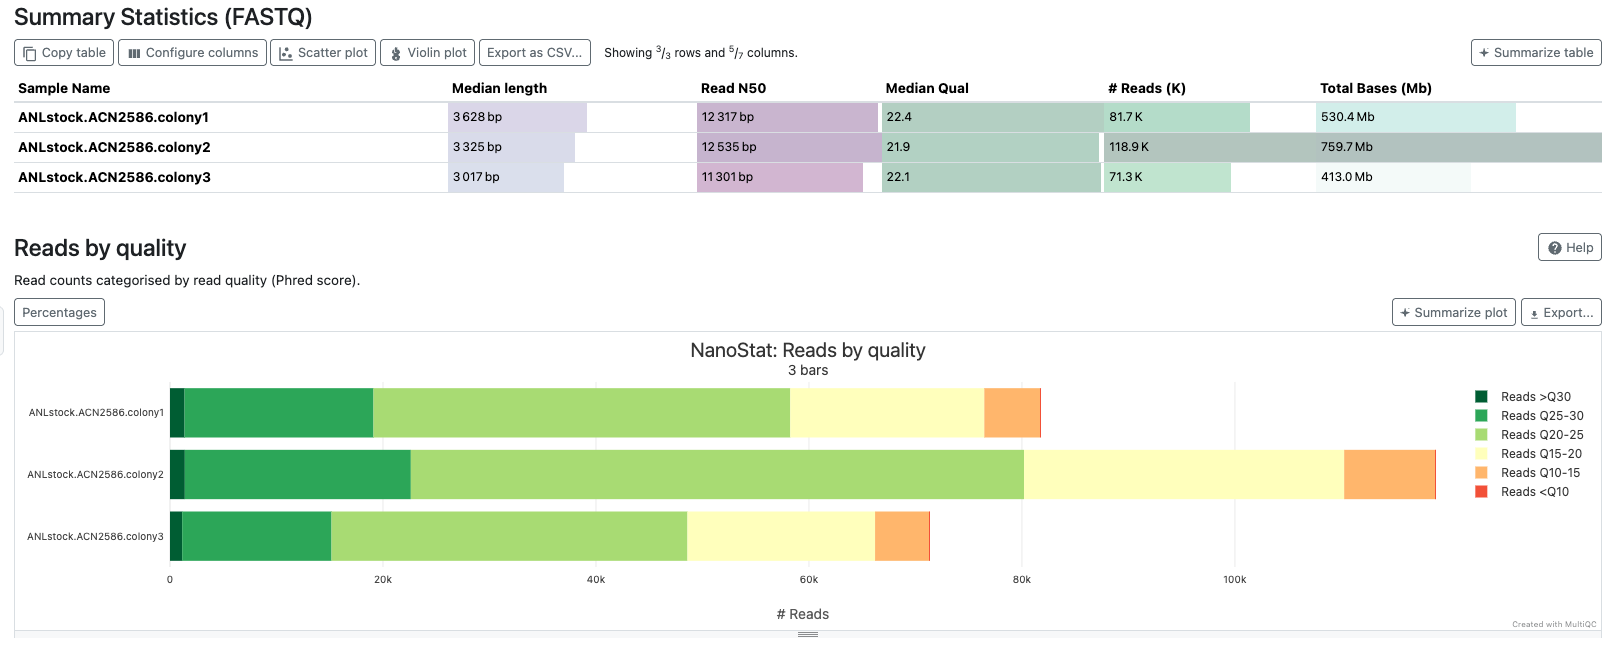

After filtering:

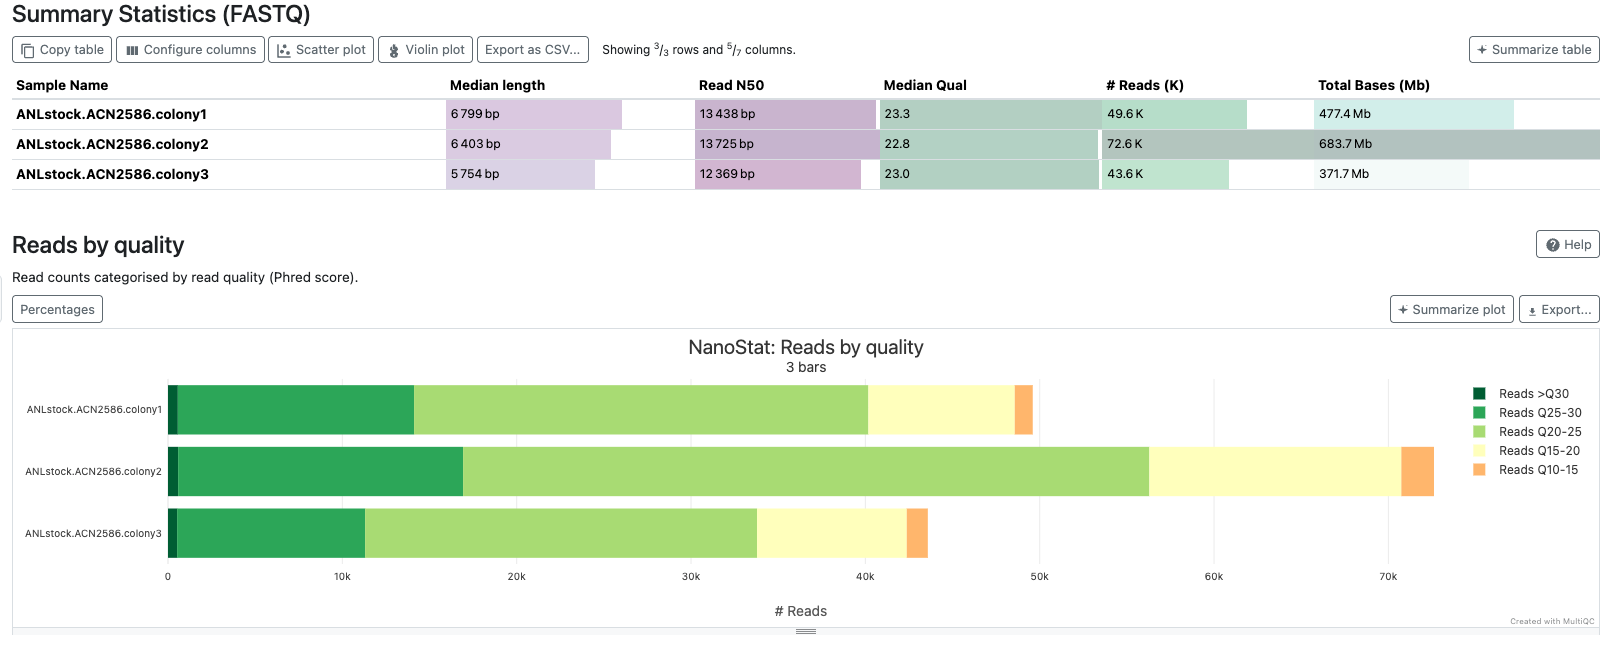

There are fewer high quality reads after filtering, indicating that removal of the shortest reads also removes the highest quality reads. This is expected. Depending on the purpose of the analysis, this may be a desired result. For assembly and copy number analysis --> limit read length. For variant ID --> retain highest-quality reads.

## Long reads: Blast analysis

In [1]:
# Make sure to run in bre_env

In [2]:
## Running on poplar
## Make sure running in appropriate kernel

import sys, os

# Must add environment's bin to the PATH inside the notebook
env_bin = os.path.join(os.path.dirname(sys.executable), "")
os.environ["PATH"] = env_bin + ":" + os.environ["PATH"]

# Must add ai_synbio repo to PATH
sys.path.append('/home/nspahr/code/ai_synbio_data_processing/')

In [3]:
# Reload magic command to ensure that changes made to my imported modules are being picked up by the notebook continuously

%load_ext autoreload
%autoreload 2

In [4]:
# Define AI-Synbio project data directories

LIB_DIR = '/storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/'
library = 'Plasmidsaurus_10-06-2025_P4CYGL'
lib_path = os.path.join(LIB_DIR, library)
shortlib = os.path.join(lib_path, os.path.basename(lib_path) + '_Illumina')
longlib = os.path.join(lib_path, os.path.basename(lib_path) + '_Nanopore')

In [5]:
# Define my Jupyter Hub home directories for viewing intermittent results

home_lib_path = os.path.join('/storage/nspahr/', 'lib_analysis', library)
os.makedirs(home_lib_path, exist_ok=True)

In [6]:
BLAST_DIR = '/storage/synbio/ai_synbio_data/reference_data/blast_dbs/'
blast_db = 'ADP1_Neidle_dgoA_flanks'
db_path = os.path.join(BLAST_DIR, blast_db, blast_db)

In [7]:
import os

long_filtered = os.path.join(longlib, 'filtered')
long_blast = os.path.join(longlib, 'blast')
os.makedirs(long_filtered, exist_ok=True)

blast_param = os.path.join(long_blast, f'blast_{blast_db}')
os.makedirs(blast_param, exist_ok = True)

In [9]:
manifest

,sample_name,nanopore_fastq
0,ANLstock.ACN2586.colony1,/storage/synbio/ai_synbio_data/experimental_da...
1,ANLstock.ACN2586.colony2,/storage/synbio/ai_synbio_data/experimental_da...
2,ANLstock.ACN2586.colony3,/storage/synbio/ai_synbio_data/experimental_da...


In [21]:
from blast import blast_reads
from binfo_utils import create_manifest

manifest = create_manifest(long_filtered, platform='plasmidsaurus_hybrid')

manifest['blast_results'] = [
    blast_reads(
        row['nanopore_fastq'],
        db_path,
        os.path.join(blast_param, row['sample_name']+'_blast_results.tsv')
        )[0]        
    for _, row in manifest.iterrows()
]


blastn -db /storage/synbio/ai_synbio_data/reference_data/blast_dbs/ADP1_Neidle_dgoA_flanks/ADP1_Neidle_dgoA_flanks -query /storage/nspahr/tmp/ANLstock.ACN2586.colony1_nanopore_filtered.fasta -out /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/blast/blast_ADP1_Neidle_dgoA_flanks/ANLstock.ACN2586.colony1_blast_results.tsv -num_threads 64 -evalue 100 -outfmt 6 stitle sseqid qseqid pident nident qlen length mismatch gapopen qstart qend sstart send evalue
BLAST results saved to /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/blast/blast_ADP1_Neidle_dgoA_flanks/ANLstock.ACN2586.colony1_blast_results.tsv
blastn -db /storage/synbio/ai_synbio_data/reference_data/blast_dbs/ADP1_Neidle_dgoA_flanks/ADP1_Neidle_dgoA_flanks -query /storage/nspahr/tmp/ANLstock.ACN2586.colony2_nanopore_filtered.fasta -out /storage

In [22]:
# Process blast results

from blast import process_flank_blast_results

manifest['both_flanks_blast_results'] = [
    process_flank_blast_results(x)[0][0]        
    for x in manifest['blast_results']
]

manifest['one_flank_blast_results'] = [
    process_flank_blast_results(x)[1][0]        
    for x in manifest['blast_results']
]

Processing /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/blast/blast_ADP1_Neidle_dgoA_flanks/ANLstock.ACN2586.colony1_blast_results.tsv
Processing /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/blast/blast_ADP1_Neidle_dgoA_flanks/ANLstock.ACN2586.colony2_blast_results.tsv
Processing /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/blast/blast_ADP1_Neidle_dgoA_flanks/ANLstock.ACN2586.colony3_blast_results.tsv
Processing /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Nanopore/blast/blast_ADP1_Neidle_dgoA_flanks/ANLstock.ACN2586.colony1_blast_results.tsv
Processing /storage/synbio/ai_synbio_data/experimental_data/sequenci

In [23]:
import pandas as pd

# Get number of reads per sample that have one flank, that have two flanks

manifest['n_reads_both_flanks'] = [
    int(len(pd.read_csv(x, sep='\t'))/2) # 2 flank results have 2 hits per read
    if x is not None else 0
    for x in manifest['both_flanks_blast_results']
]
    
manifest['n_reads_one_flank'] = [
    len(pd.read_csv(x, sep='\t'))
    if x is not None else 0
    for x in manifest['one_flank_blast_results']
]    

In [24]:
manifest

,sample_name,nanopore_fastq,blast_results,both_flanks_blast_results,one_flank_blast_results,n_reads_both_flanks,n_reads_one_flank
0,ANLstock.ACN2586.colony1,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...,34,90
1,ANLstock.ACN2586.colony2,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...,90,241
2,ANLstock.ACN2586.colony3,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...,23,70


### Both flank results

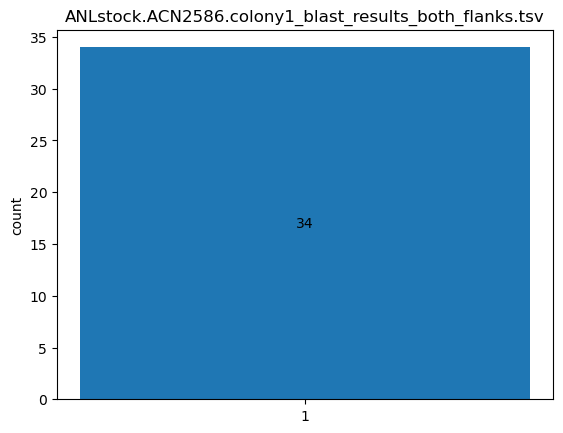

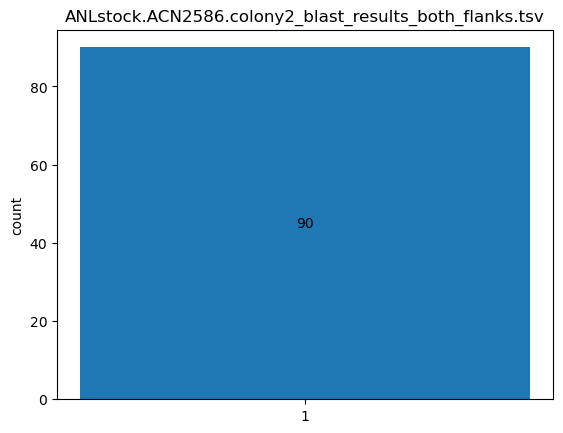

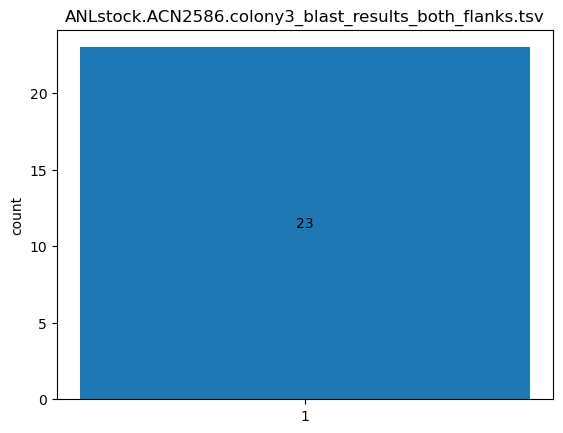

In [25]:
from blast import excise_insertion_seq

manifest['amplicon_multiple'] = [
    excise_insertion_seq(
        x,
        expect_amplicon_len = 6553,
        out_pdf = x.replace('.tsv', '_amplicon_multiples.pdf')
    )['n_amplicons'].mean()
    if x is not None else None
    for x in manifest['both_flanks_blast_results']
]